# Limits to Growth Archetype

Nothing can grow indefinitely, hence a reinforceing, growing loop will destroy any system that is part of unless it is kept in check by a balancing loop.

The following causal loop diagram shows the limits to growth archetype in its simplest form:

![Causal Loop Diagram of Limits to Growth Archetype](cld_limits_to_growth.svg)

At is heart is a reinforcing loop that changes the state of the system according to a growth factor, just as in the reinforcing loop archetype. But in contrast to that archetype, the growth factor isn't constant but is limit by the resource adequacy of the system.

The resource adequacy get's smaller and smaller when the systems state approaches the carrying capacity.

If there are no delays in the system, then this limits to growth archetype while display S-shaped growth. If there are delays present, then the growth of the system will overshoot the carrying capacity and then will oscillate around that value.

## A Stock and Flow Model of the Limits To Growth Archetype

Let's take a look at a stock and flow diagram for this archetype. In this diagram, we've separated the fractional change into a constant, which is then multiplied by the resource adequacy. This leads to an _adjusted fractional change_

![Stock and Flow Diagram of the Limits To Growth Archetype](sfd_limits_to_growth.svg)

Given the diagram, we can build a model as shown below.

In [1]:
from BPTK_Py import Model, bptk
from BPTK_Py import sd_functions as sd

In [2]:
model = Model(starttime=0.0,stoptime=260.0,dt=1.0,name='Limits_to_growth')

In [3]:
# decleare elements
state = model.stock("state")
change = model.biflow("change")
adjusted_fractional_change = model.converter("adjusted_fractional_change")
fractional_change = model.constant("fractional_change")
resource_adequacy = model.converter("resource_adequacy")
carrying_capacity = model.constant("carrying_capacity")
delay_resource_adequacy = model.constant("delay_resource_adequacy")

In [4]:
# define elements
state.initial_value=1.0
state.equation=change

change.equation = state*adjusted_fractional_change
adjusted_fractional_change.equation= fractional_change*resource_adequacy
resource_adequacy.equation = (carrying_capacity - sd.delay(model, state, delay_resource_adequacy,1.0))/carrying_capacity
fractional_change.equation=0.1
carrying_capacity.equation= 50.0

delay_resource_adequacy.equation = 0.0

In [5]:
bptk = bptk()

In [6]:
bptk.register_model(model)

The plot below shows that the Limits to Growth archetype leads to S-shaped growth if there are no delays present in the system.

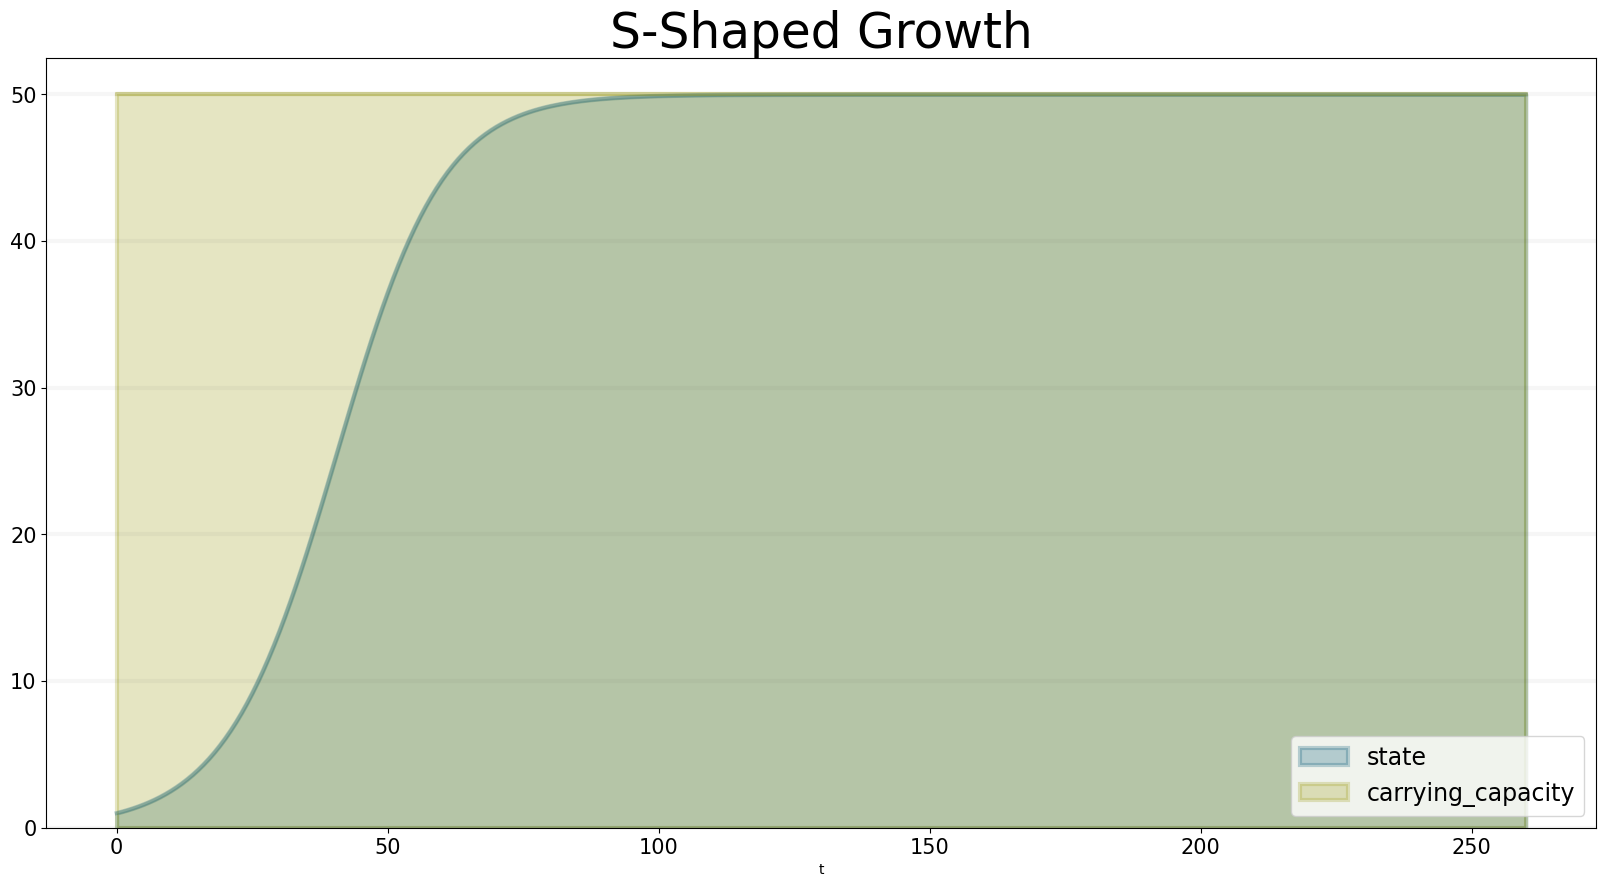

In [7]:
bptk.plot_scenarios(
    title="S-Shaped Growth",
    scenario_managers=["smLimits_to_growth"],
    scenarios=["base"],
    equations=["state","carrying_capacity"])

Now let's add a scenario that introduces a delay: in this case we assume that the adjustment of the resource adequacy lags behind the actual system state by 10 weeks - this leads to an oscillatory behavior as displayed in the plot below.

In [8]:
bptk.register_scenarios(
    scenario_manager="smLimits_to_growth",
    scenarios={
        "oscillations":{
            "constants":{
                "delay_resource_adequacy":10.0
            }
        }
    }
)

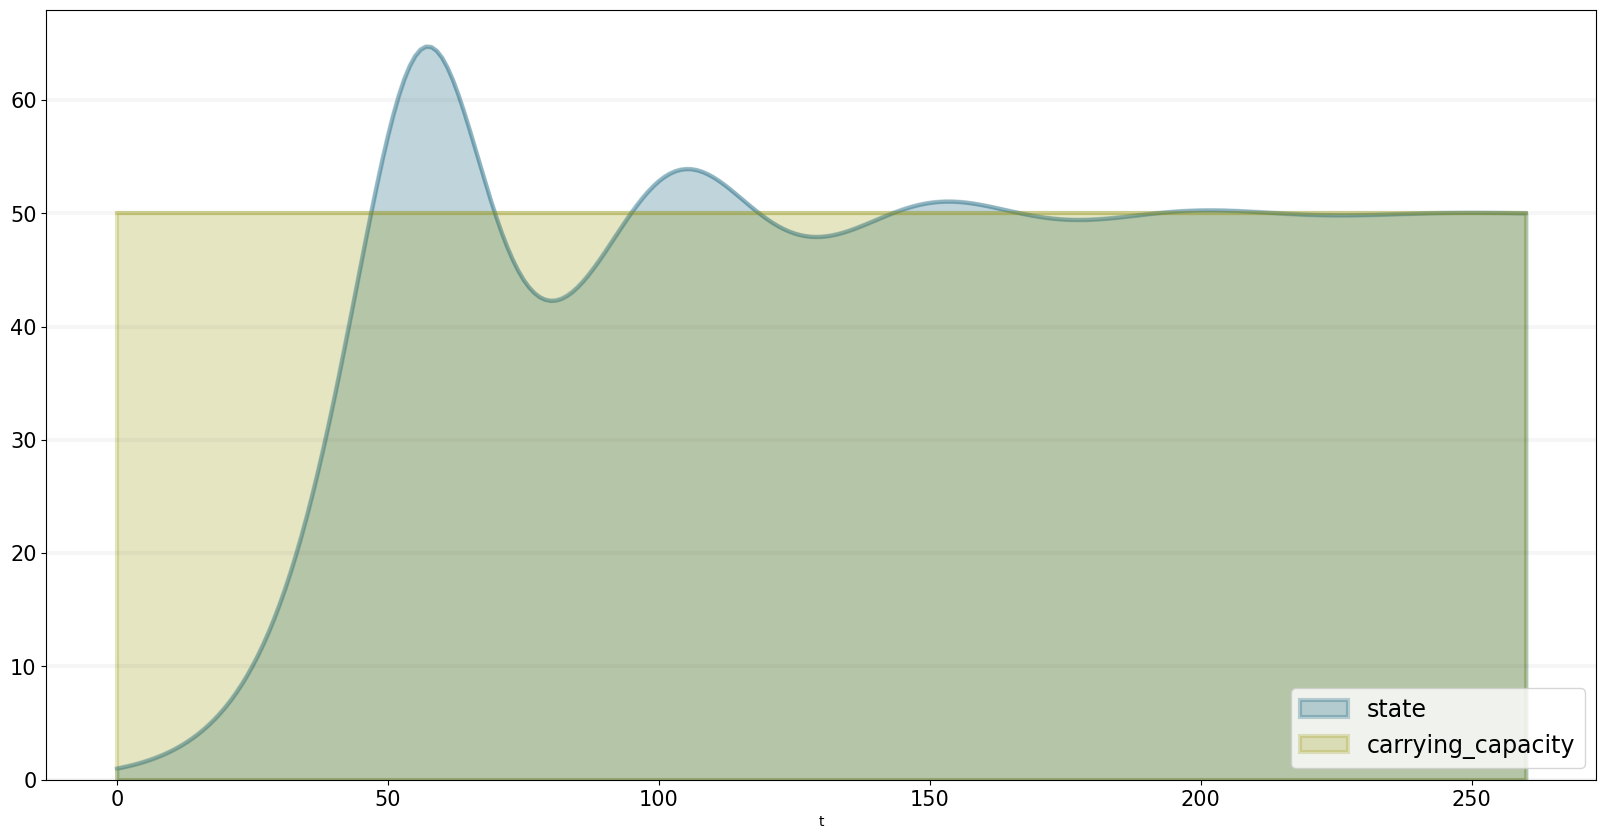

In [9]:
bptk.plot_scenarios(scenario_managers=["smLimits_to_growth"],scenarios=["oscillations"],equations=["state","carrying_capacity"])

## Experimenting with the Limits To Growth Archetype

In [10]:
from BPTK_Py.visualizations import SimpleDashboard
import ipywidgets as widgets

bptk.register_scenarios(
    scenario_manager="smLimits_to_growth",
    scenarios={
    "interactive":{}
    }
)

dashboard = SimpleDashboard(bptk, scenario_manager="smLimits_to_growth", scenario="interactive")

In [11]:
wdg_delay_slider = widgets.FloatSlider(
    min=0.0, 
    max=20.0, 
    value=10.0, 
    step=1.0
)

wdg_increase_rate_slider=widgets.FloatSlider(
    min=0.0,
    max=0.2,
    value=0.1,
    step=0.01
)

In [12]:
dashboard.add_widget(wdg_delay_slider, "delay_resource_adequacy")
dashboard.add_widget(wdg_increase_rate_slider, "fractional_change")

plot = dashboard.add_plot(
    equations=["state","carrying_capacity"], 
    names=["State", "Carrying Capacity"],
    title="System State",
    x_label="Week",
    y_label="State",
)

controls = widgets.HBox([
    widgets.VBox([widgets.Label("Delay"),widgets.Label("Fractional Change Rate")]),
    widgets.VBox([wdg_delay_slider,wdg_increase_rate_slider])
    ])
display(plot)
display(controls)
dashboard.start()

Output()